In [1]:
from lda_model import sent_to_words, process_data_words, build_model,format_topics_sentences,frequency_distribution_word_counts_in_documents


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
filepath='/home/yiyi/Documents/masterthesis/CPD/data/cleand_query_output_csv/019b8823-aa09-4d8f-8b8d-26433d76dff3'
df = pd.read_csv(filepath)

In [3]:
df = df.replace(np.nan, '', regex=True)
df.text = df.text.astype(str)
df.title = df.title.astype(str)
df["words"] = df.title+' '+df.text
en_df = df[df.lang=='en']
en_df= en_df[en_df.words.notnull()]

In [4]:
en_df.head()

,uid,date,score,recommendation_rate,lang,title,text,words
0,7041b7b3-f9d2-4d7c-b34b-f9c2bd632671,2009-07-01 00:00:00,60,,en,,Really not worth the money. Nickle-and-dimed f...,Really not worth the money. Nickle-and-dimed ...
1,ecc1ef55-1f8f-44da-bcce-057a29138cae,2009-07-01 00:00:00,100,,en,,Had a fantastic time. Excellent Resort. From...,Had a fantastic time. Excellent Resort. Fro...
2,11ae2de8-7b02-4b17-9a71-b166b77d8365,2010-07-01 00:00:00,100,,en,,We had probably the best stay we've ever had i...,We had probably the best stay we've ever had ...
3,b2230e67-e20e-425d-b8f2-ddf5359bb74b,2009-07-01 00:00:00,80,,en,,"Beautiful Beach, Friendly staff.The Ocean view...","Beautiful Beach, Friendly staff.The Ocean vie..."
4,5e5de5ba-7433-4bcf-b27f-1690255833fd,2010-07-01 00:00:00,100,,en,,"So I only stayed one night but wow, what a nig...","So I only stayed one night but wow, what a ni..."


In [5]:
docs = en_df.words.to_list()  # => data
# process the data words
data_words = list(sent_to_words(docs))

data_ready = process_data_words(data_words)
# build lda model

In [6]:
len(data_ready), len(en_df)

(8069, 8069)

In [7]:
en_df['processed_words']= [" ".join(text) for text in data_ready]

In [8]:
en_df.head(4)

,uid,date,score,recommendation_rate,lang,title,text,words,processed_words
0,7041b7b3-f9d2-4d7c-b34b-f9c2bd632671,2009-07-01 00:00:00,60,,en,,Really not worth the money. Nickle-and-dimed f...,Really not worth the money. Nickle-and-dimed ...,really worth money nickle dim half shower clos...
1,ecc1ef55-1f8f-44da-bcce-057a29138cae,2009-07-01 00:00:00,100,,en,,Had a fantastic time. Excellent Resort. From...,Had a fantastic time. Excellent Resort. Fro...,fantastic time excellent resort check man book...
2,11ae2de8-7b02-4b17-9a71-b166b77d8365,2010-07-01 00:00:00,100,,en,,We had probably the best stay we've ever had i...,We had probably the best stay we've ever had ...,probably best stay resort mid relax enjoy reac...
3,b2230e67-e20e-425d-b8f2-ddf5359bb74b,2009-07-01 00:00:00,80,,en,,"Beautiful Beach, Friendly staff.The Ocean view...","Beautiful Beach, Friendly staff.The Ocean vie...",friendly staff luxury suite smaller expexte co...


In [9]:
import numpy as np
import tqdm as tqdm

import scipy.sparse as s_sparse

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

/home/yiyi/anaconda3/envs/CPD/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/yiyi/anaconda3/envs/CPD/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Topic Modeling

In [10]:
vectorizer = TfidfVectorizer(
    max_df=.5,
    min_df=10,
    max_features=None,
    ngram_range=(1, 2),
    norm=None,
    binary=True,
    use_idf=False,
    sublinear_tf=False
)
vectorizer = vectorizer.fit(en_df['processed_words'])
tfidf = vectorizer.transform(en_df['processed_words'])
vocab = vectorizer.get_feature_names()
print(len(vocab))

5071


In [32]:
from categories import CATEGORIES

In [33]:
categories_lower = [[x.lower() for x in category] for category in CATEGORIES]
len(categories_lower)

15

In [13]:
model = ct.Corex(n_hidden=15, seed=42)
model = model.fit(
    tfidf,
    words=vocab
)

In [14]:
for i, topic_ngrams in enumerate(model.get_topics(n_words=10)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: check, call, tell, ask, arrive, hour, wait, pm, finally, put
Topic #2: beach, staff, friendly, great, pool, helpful, clean, private, location, private beach
Topic #3: reach, stay, stay reach, time, resort, first, trip, next, reach resort, towel
Topic #4: bathroom, elevator, floor, shower, dirty, work, door, stain, carpet, furniture
Topic #5: night, find, give, expect, much, really, thing, leave, still, guest
Topic #6: pay, price, bad, property, rate, old, disappointed, average, terrible, poor
Topic #7: restaurant, drink, food, bar, eat, wonderful, dinner, lunch, food drink, set
Topic #8: small, view, large, balcony, area, ocean, water, courtyard, size, pool area
Topic #9: charge, walk, parking, hotel, fee, resort_fee, car, park, include, cost
Topic #10: day, people, bed, morning, start, sit, end, way, entire, day stay
Topic #11: never, year, manager, member, ready, ever, room ready, receive, different, last
Topic #12: review, spend, read, order, week, choose, enough, turn, ex

In [34]:
anchors=[
    [a for a in topic if a in vocab]
    for topic in categories_lower
]
anchors = list(filter(lambda x: len(x)>0, anchors))

In [35]:
anchors.append(["redecoration", "renovation", "repair", "restore", "restoration", "renewal",
                "rehabilitation", "revamping", "reimagine", "refurbishment",
                "refitting", "fixing up", "reconditioning"])

In [36]:
len(anchors)

16

In [47]:
model = ct.Corex(n_hidden=16, seed=42)
model = model.fit(
    tfidf,
    words=vocab,
    anchors=anchors, # Pass the anchors in here
    anchor_strength=6 # Tell the model how much it should rely on the anchors
)

In [48]:
for i, topic_ngrams in enumerate(model.get_topics(n_words=10)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: view, bathroom, balcony, shower, furniture, tv, room size, view room, great view, new room
Topic #2: comfort, arrive, give, wait, people, next, guest, well, sit, bring
Topic #3: cleanliness, expect, never, dirty, floor, bad, property, money, stain, point
Topic #4: beach, private beach, private, beach staff, beach great, hotel beach, beach area, small beach, beach small, seaweed
Topic #5: breakfast, eat breakfast, service breakfast, free breakfast, breakfast lunch, breakfast include, expensive, great breakfast, buffet, bed breakfast
Topic #6: food, menu, steak, fish, seafood, food drink, great food, food service, pizza, food restaurant
Topic #7: bar, bar restaurant, pool bar, restaurant bar, drink bar, bar staff, bar pool, bar great, beach bar, bar area
Topic #8: location, parking, great location, shopping, location great, great, hotel location, location perfect, perfect location, location hotel
Topic #9: service, room service, management, reception, pool service, beach servic

In [49]:

topic_df = pd.DataFrame(
    model.transform(tfidf), 
    columns=["topic_{}".format(i+1) for i in range(16)]
).astype(float)
topic_df.index = en_df.index
df = pd.concat([en_df, topic_df], axis=1)

In [41]:
anchors

[['bathroom',
  'balcony',
  'view',
  'tv',
  'furniture',
  'family room',
  'shower',
  'room size',
  'old room',
  'new room'],
 ['comfort', 'noise level'],
 ['cleanliness'],
 ['beach'],
 ['breakfast'],
 ['food', 'menu', 'meat', 'steak', 'fish', 'seafood', 'pizza'],
 ['bar'],
 ['location', 'sightseeing', 'shopping', 'parking'],
 ['service',
  'reception',
  'restaurant service',
  'pool service',
  'beach service',
  'housekeeping staff',
  'management',
  'bar service',
  'room service'],
 ['vibe'],
 ['wifi'],
 ['pool'],
 ['fitness'],
 ['value', 'terrace', 'elevator'],
 ['hotel', 'luxury hotel', 'family hotel', 'resort hotel', 'beach hotel'],
 ['redecoration',
  'renovation',
  'repair',
  'restore',
  'restoration',
  'renewal',
  'rehabilitation',
  'revamping',
  'reimagine',
  'refurbishment',
  'refitting',
  'fixing up',
  'reconditioning']]

In [50]:
df = df.sort_values('date')

In [43]:
len(df)

8069

In [114]:
df.to_csv('test.csv')

In [68]:
df = df.reset_index().drop(columns=['index'])

In [ ]:
df.head(3)

In [ ]:
renovat_df = df[df.topic_16==1.0]

In [ ]:
len(renovat_df)

In [ ]:
renovat_df.head(4)

In [ ]:
renovat_df['index_df']= renovat_df.index

In [ ]:
renovat_df

In [ ]:
renovat_df.to_csv('test_renovat.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt
import time


In [ ]:
%matplotlib inline
def binseg(scores):
    # fast
    model = "l2"
    n_samples = scores.shape[0]
    algo = rpt.Binseg(model=model).fit(scores)
    try:
        my_bkps = algo.predict(n_bkps=5)
        print('change points:', my_bkps)
        # show results

        rpt.show.display(scores, my_bkps, figsize=(10, 6))
        plt.title('Change Point Detection: Binary Segmentation Search Method')
        plt.show()
    except Exception as msg:
        print(msg)

In [ ]:
scores = np.array(renovat_df['score'])

In [ ]:
binseg(scores)

In [ ]:
# without topic modeling
scores_df = np.array(df['score'])

In [ ]:
scores_df = df[df['score']!='']

In [ ]:
scores_df = np.array([float(x) for x in df['score'] if x!=''])

In [ ]:
binseg(scores_df)

,uid,date,score,recommendation_rate,lang,title,text,words,processed_words,topic_1,...,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16
0,4b7285ad-3a16-4053-b525-421b92ea3450,2002-06-28 00:00:00,100,,en,Beware of the servibar..,"We were very satisfied with our room, the view...",Beware of the servibar.. We were very satisfie...,beware servibar satisfied room view sandy beac...,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,e8540cc1-7b83-4579-b1d5-156b4a77b3fc,2003-02-11 00:00:00,20,,en,,"Dingy, dirty smelly small room. Asked to chang...","Dingy, dirty smelly small room. Asked to chan...",smelly small room ask change room twice day ac...,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3e1c0aa4-9f1f-461c-ae12-f0e4cac45426,2003-02-24 00:00:00,40,,en,,I was very disappointed in my stay at the Wynd...,I was very disappointed in my stay at the Wyn...,disappointed stay trip research hotel feel web...,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [126]:
renovat_df = df[df.topic_16==1.0]

In [127]:
len(renovat_df)

1746

In [128]:
renovat_df.head(4)

,uid,date,score,recommendation_rate,lang,title,text,words,processed_words,topic_1,...,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16
1,e8540cc1-7b83-4579-b1d5-156b4a77b3fc,2003-02-11 00:00:00,20,,en,,"Dingy, dirty smelly small room. Asked to chang...","Dingy, dirty smelly small room. Asked to chan...",smelly small room ask change room twice day ac...,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3e1c0aa4-9f1f-461c-ae12-f0e4cac45426,2003-02-24 00:00:00,40,,en,,I was very disappointed in my stay at the Wynd...,I was very disappointed in my stay at the Wyn...,disappointed stay trip research hotel feel web...,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,81abf557-2ada-4931-80eb-d80b3f3e7e8b,2003-06-16 00:00:00,80,,en,,My wife and I just returned from our stay at T...,My wife and I just returned from our stay at ...,wife return stay reach resort wonderful time f...,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
8,7ee34dc4-45ca-45eb-87b8-facaf71af202,2003-06-17 00:00:00,60,,en,,Most places rated this hotel a 4 star. Due to ...,Most places rated this hotel a 4 star. Due to...,place rate hotel star due noticeable age rate ...,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [130]:
renovat_df['index_df']= renovat_df.index

<ipython-input-130-37e2452d662f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renovat_df['index_df']= renovat_df.index


In [131]:
renovat_df

,uid,date,score,recommendation_rate,lang,title,text,words,processed_words,topic_1,...,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,index_df
1,e8540cc1-7b83-4579-b1d5-156b4a77b3fc,2003-02-11 00:00:00,20,,en,,"Dingy, dirty smelly small room. Asked to chang...","Dingy, dirty smelly small room. Asked to chan...",smelly small room ask change room twice day ac...,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,3e1c0aa4-9f1f-461c-ae12-f0e4cac45426,2003-02-24 00:00:00,40,,en,,I was very disappointed in my stay at the Wynd...,I was very disappointed in my stay at the Wyn...,disappointed stay trip research hotel feel web...,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
7,81abf557-2ada-4931-80eb-d80b3f3e7e8b,2003-06-16 00:00:00,80,,en,,My wife and I just returned from our stay at T...,My wife and I just returned from our stay at ...,wife return stay reach resort wonderful time f...,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,7
8,7ee34dc4-45ca-45eb-87b8-facaf71af202,2003-06-17 00:00:00,60,,en,,Most places rated this hotel a 4 star. Due to ...,Most places rated this hotel a 4 star. Due to...,place rate hotel star due noticeable age rate ...,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,8
9,7ebb830f-29b3-4faf-b990-ef7332a03cc0,2003-06-23 00:00:00,40,,en,,"While I got what I paid for, this hotel wasn't...","While I got what I paid for, this hotel wasn'...",pay hotel expect luckily cheap package price p...,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,5fa691da-a007-4453-a222-0ea0a64f35b8,2020-03-02 00:00:00,60,,en,Stay,My room was ready when I arrived. Front desk w...,Stay My room was ready when I arrived. Front d...,stay room arrive woman ask number call still r...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8059
8061,a6ee54a3-24dd-4be9-92c2-7e7524f1e08d,2020-03-02 00:00:00,60,,en,Winter Getaway,Just finishing up a stay at The Reach. We have...,Winter Getaway Just finishing up a stay at The...,finishing stay reach number time usually stay ...,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,8061
8063,42d2881d-37ec-4c7f-92b7-47e4e02eb0f8,2020-03-03 00:00:00,20,,en,24 dollar carrots ... not fit for a king !,Had dinner at the four marlins restaurant at t...,24 dollar carrots ... not fit for a king ! Had...,dollar dinner restaurant reach extensive renov...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8063
8065,d6d81715-22f2-4373-abd0-d574fe11273e,2020-03-05 00:00:00,80,,en,"Nice location, average hotel",This hotel was perfect for what we wanted for ...,"Nice location, average hotel This hotel was pe...",hotel hotel perfect night stay hotel room comf...,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,8065


In [91]:
renovat_df.to_csv('test_renovat.csv')

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt
import time


In [95]:
%matplotlib inline
def binseg(scores):
    # fast
    model = "l2"
    n_samples = scores.shape[0]
    algo = rpt.Binseg(model=model).fit(scores)
    try:
        my_bkps = algo.predict(n_bkps=5)
        print('change points:', my_bkps)
        # show results

        rpt.show.display(scores, my_bkps, figsize=(10, 6))
        plt.title('Change Point Detection: Binary Segmentation Search Method')
        plt.show()
    except Exception as msg:
        print(msg)

In [89]:
scores = np.array(renovat_df['score'])

change points: [80, 975, 1210, 1630, 1715, 1746]


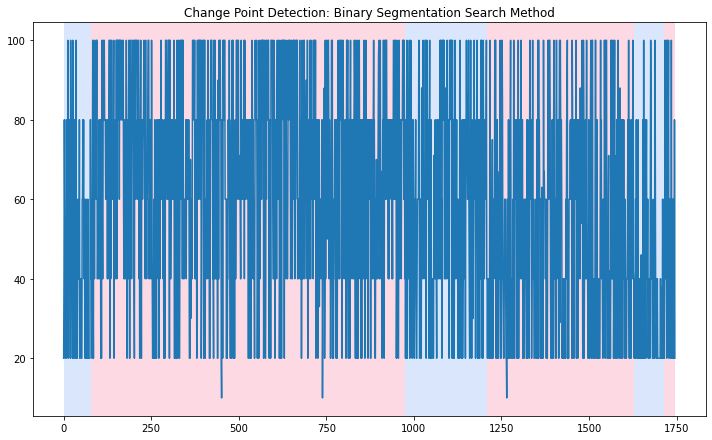

In [90]:
binseg(scores)

In [112]:
# without topic modeling
scores_df = np.array(df['score'])

In [115]:
scores_df = df[df['score']!='']

In [123]:
scores_df = np.array([float(x) for x in df['score'] if x!=''])

change points: [195, 5315, 7375, 7750, 7990, 8068]


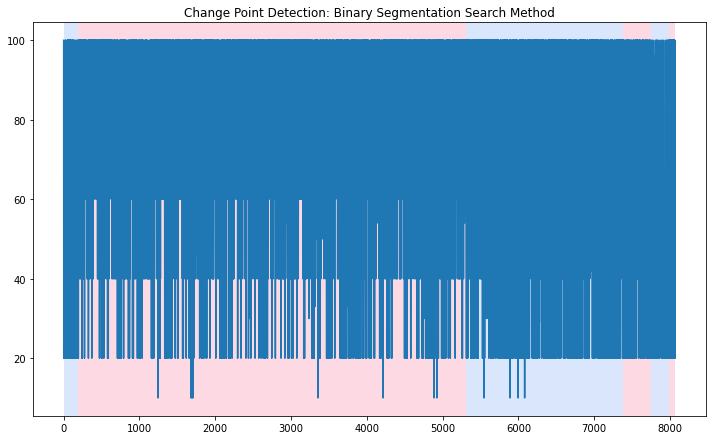

In [124]:
binseg(scores_df)